In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (10,5)


In [7]:
data = {
    "speed": np.random.normal(80, 15, 1000),
    "rpm": np.random.normal(2500, 600, 1000),
    "throttle": np.random.uniform(5, 90, 1000),
    "brake": np.random.choice([0, 1], 1000, p=[0.9, 0.1]),
    "acceleration": np.random.normal(0, 1.5, 1000)
}

df = pd.DataFrame(data)
df.head()


,speed,rpm,throttle,brake,acceleration
0,72.513108,2257.815965,29.354585,0,-0.871988
1,96.053267,2022.750352,72.300222,0,0.157701
2,68.758950,1450.341735,72.664534,0,2.143314
3,102.608254,3154.423688,10.355622,0,-1.612108
4,108.574235,2914.658922,59.344428,0,-2.285808


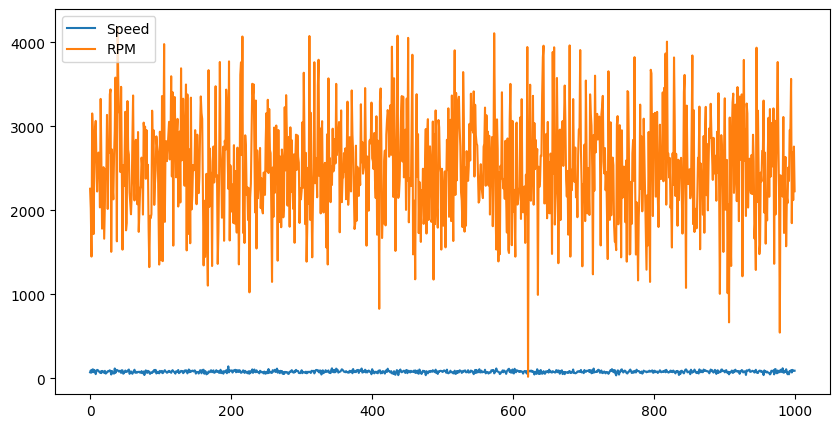

In [8]:
df.describe()
plt.plot(df["speed"], label="Speed")
plt.plot(df["rpm"], label="RPM")
plt.legend()
plt.show()


In [9]:
df["aggressive_score"] = (
    (df["speed"] > 120).astype(int) +
    (df["rpm"] > 3500).astype(int) +
    (df["throttle"] > 70).astype(int) +
    (df["acceleration"] > 2).astype(int)
)

df["driving_style"] = pd.cut(
    df["aggressive_score"],
    bins=[-1, 1, 3, 10],
    labels=["calm", "normal", "aggressive"]
)

df["driving_style"].value_counts()


,count
driving_style,
calm,970
normal,30
aggressive,0


In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
X = df[["speed", "rpm", "throttle", "brake", "acceleration"]]
y = df["driving_style"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
model = RandomForestClassifier(
    n_estimators=200,
    max_depth=8,
    random_state=42
)

model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

        calm       1.00      1.00      1.00       243
      normal       1.00      1.00      1.00         7

    accuracy                           1.00       250
   macro avg       1.00      1.00      1.00       250
weighted avg       1.00      1.00      1.00       250

